In [1]:
import numpy as np
from scipy import sparse
import copy

In [2]:
class SNN():
    
    def __init__(self, input_neurons, inter_neurons, output_neurons):
        self.input_neurons = input_neurons
        self.inter_neurons = inter_neurons
        self.output_neurons = output_neurons
        self.total_neurons = self.input_neurons + self.inter_neurons + self.output_neurons
        self.potentials = np.zeros((self.total_neurons,))
        self.weight_matrix = np.zeros((self.inter_neurons + self.output_neurons, self.input_neurons + self.inter_neurons))
        self.weight_mask = np.ones_like(self.weight_matrix, dtype=np.uint8)
        self.weight_mask[-self.output_neurons:, :self.input_neurons] = 0
        np.fill_diagonal(self.weight_mask[:self.inter_neurons, -self.inter_neurons:], 0)
        self.random_seed = None
    
    def interconnect(self, density):
        mask = np.random.binomial(1, density, self.weight_matrix.shape)
        rand = np.random.uniform(-1, 1, self.weight_matrix.shape)
        self.weight_matrix = mask * rand * self.weight_mask
#         self.weight_matrix = np.zeros_like(self.weight_matrix)
#         probabilities = np.vectorize(lambda i, j: 1 / abs(i - j) if i != j else 0.)(*np.meshgrid(range(self.inter_neurons), range(self.inter_neurons)))
#         mask = np.zeros((self.weight_matrix.shape[0], self.weight_matrix.shape[1]))
#         mask[:-self.output_neurons, self.input_neurons:] = np.random.binomial(1, probabilities, (self.inter_neurons, self.inter_neurons))
#         mask[:self.inter_neurons, :self.input_neurons] = np.eye(self.inter_neurons)[np.random.choice(self.inter_neurons, self.input_neurons)].swapaxes(0, 1)
#         mask[self.inter_neurons:, self.input_neurons:] = np.eye(self.inter_neurons)[np.random.choice(self.inter_neurons, self.output_neurons)]
#         rand1 = np.random.uniform(0, 1, (self.weight_matrix.shape[0], self.weight_matrix.shape[1]))
#         rand1[:-self.output_neurons, self.input_neurons:] = rand1[:-self.output_neurons, self.input_neurons:] * 2 - 1
#         rand2 = np.random.uniform(0, 1, (self.weight_matrix.shape[0], self.weight_matrix.shape[1]))
#         self.weight_matrix = mask * rand1 * rand2 * self.weight_mask
    
    def mutate(self, delta_rate, connect_rate, prune_rate):
        def mutation(weight, mask):
            if mask:
                if weight:
                    if np.random.binomial(1, prune_rate):
#                         print("prune")
                        return 0
                    elif np.random.binomial(1, delta_rate):
#                         print("delta")
                        return weight + np.random.uniform(-1, 1)
                elif np.random.binomial(1, connect_rate):
#                     print("connect")
                    return np.random.uniform(-1, 1)
            return weight
        
#         mask = np.random.binomial(1, mutation_rate, self.weight_matrix.shape) * self.weight_mask
        self.weight_matrix = np.vectorize(mutation)(self.weight_matrix, self.weight_mask)
    
    def load_weights(self, weights):
        self.weight_matrix[:, :] = weights
        
    def reset(self):
        self.potentials = np.zeros_like(self.potentials)
    
    def step(self, inputs):
        self.potentials[:self.input_neurons] = np.add(self.potentials[:self.input_neurons], inputs)
        firing = self.potentials >= 1
        outputs = self.potentials[-self.output_neurons:] * firing[-self.output_neurons:]
        deltas = np.dot(self.weight_matrix, firing[:-self.output_neurons])
        self.potentials[self.input_neurons:] += deltas
        self.potentials = np.clip(self.potentials, -1, 1)
        self.potentials = np.multiply(self.potentials, np.invert(firing))
        return outputs

In [ ]:
snn = SNN(4, 64, 4)

In [ ]:
snn.interconnect(0.1)

In [29]:
import skimage.io
import skimage.transform

In [ ]:
skimage.io.imshow(snn.weight_matrix)

In [3]:
class TestGame():
    
    def __init__(self):
        pass
    
    def reset(self):
        return np.array([1])
    
    def step(self, action):
        state = np.array([1])
        reward = action[0]
        return state, reward

In [ ]:
class FoodGame():
    
    def __init__(self):
        self.state = np.zeros((10, 10))
        self.pos = (0, 0)
    
    def randomize
    
    def reset

In [32]:
population = [SNN(1, 10, 1) for i in range(100)]

In [33]:
environment = TestGame()

In [34]:
for snn in population:
    snn.interconnect(0.1)

In [31]:
for i in range(100):
    ranks = []
    for snn in population:
        score = 0
        state = environment.reset()
        for j in range(1000):
            state, reward = environment.step(snn.step(state))
            score += reward
        ranks.append((score, snn))
    ranks = sorted(ranks, key=lambda rank: -rank[0])
#     print([elite[0] for elite in ranks[:10]])
    print(i, ranks[0][0])
    population = [elite[1] for elite in ranks[:10]]
    for i in range(10):
        snn = population[i]
        for i in range(9):
            snn.reset()
            offspring = copy.deepcopy(snn)
            offspring.mutate(0.2, 0.01, 0.1)
            population.append(offspring)

0 500.0
1 499.0
2 499.0
3 499.0
4 499.0
5 499.0
6 499.0
7 499.0
8 499.0
9 499.0
10 499.0
11 499.0
12 499.0
13 499.0
14 499.0
15 499.0
16 499.0


KeyboardInterrupt: 

In [28]:
snn = population[0]

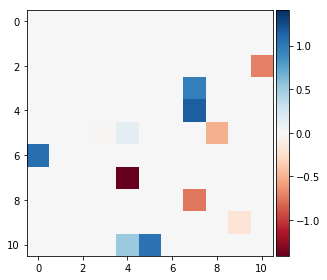

In [30]:
skimage.io.imshow(snn.weight_matrix)

In [ ]:
snn = SNN(1, 10, 1)

In [ ]:
snn.interconnect(0.1)

In [ ]:
snn.mutate(0.2, 0.01, 0.1)

In [ ]:
for i in range(1000):
    print(snn.step([1]))

In [ ]:
snn.potentials

In [ ]:
# x = sparse.rand(100, 100, 0.1, 'csr')

In [ ]:
# skimage.io.imshow(x.todense())